<a href="https://colab.research.google.com/github/GustavoBraga2605/Checkpoint-01---SERS/blob/main/Dataset_Appliances_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação dos Dados

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## 26. Carregamento e inspeção inicial
Carregue o dataset no Pandas.
Liste tipos de dados e estatísticas descritivas (.info() e describe()).

In [39]:
# Carregamento do dataset
df = pd.read_csv('/content/energydata_complete.csv')

# Listagem dos tipos de dados e estatísticas descritivas
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## 27. Distribuição do consumo
Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

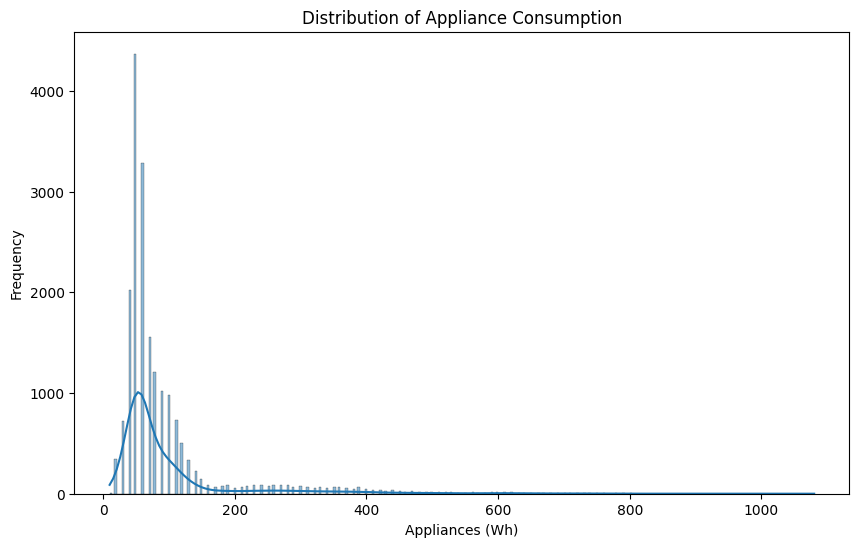

In [40]:
# Create a histogram of the 'Appliances' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Appliances'], kde=True)
plt.title('Distribution of Appliance Consumption')
plt.xlabel('Appliances (Wh)')
plt.ylabel('Frequency')
plt.show()

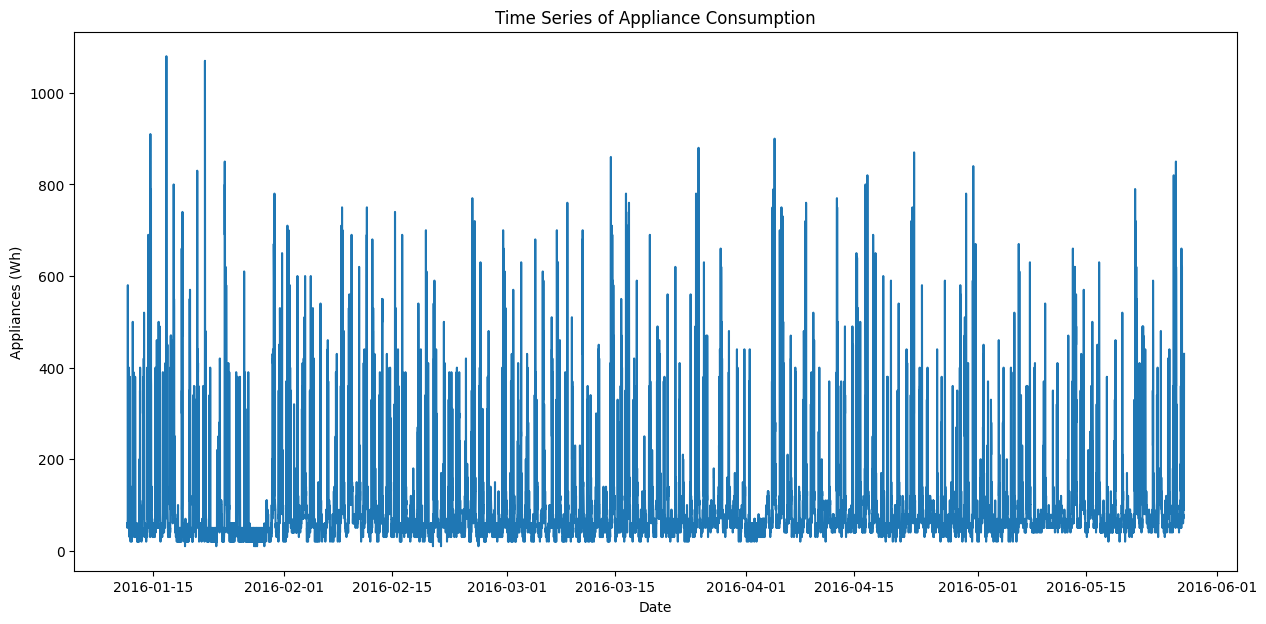

In [41]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Create a time series plot of the 'Appliances' variable
plt.figure(figsize=(15, 7))
sns.lineplot(x='date', y='Appliances', data=df)
plt.title('Time Series of Appliance Consumption')
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.show()

In [42]:
# Baseado no histograma, o consumo tende a ser concentrado em valores baixos,
# com um grande caminho se estendendo para valores de consumo mais altos.
#O gráfico de série temporal mostra variações no consumo ao longo do tempo.

## 28. Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
Pergunta: quais fatores têm mais relação com o consumo?

In [43]:
# Calculate correlations between 'Appliances' and other variables
correlations = df.corr()['Appliances'].sort_values(ascending=False)

# Display the correlations
display(correlations)

,Appliances
Appliances,1.000000
lights,0.197278
T2,0.120073
T6,0.117638
T_out,0.099155
Windspeed,0.087122
RH_1,0.086031
T3,0.085060
T1,0.055447
T4,0.040281


In [44]:
# Com base nos valores de correlação, as variáveis com a correlação positiva mais forte com 'Appliances' são 'lights', 'T2' e 'T6'.
# Por outro lado, 'RH_out', 'RH_8' e 'RH_6' mostram a correlação negativa mais forte.
# Isso sugere que o uso de iluminação e as temperaturas em certas áreas ('T2', 'T6') estão positivamente relacionados ao consumo de eletrodomésticos,
# enquanto a umidade externa e a umidade em certos cômodos ('RH_8', 'RH_6') estão negativamente relacionadas.

## 29. Normalização dos dados
- Aplique Min-Max Scaling as variáveis numéricas.
- Reutilize esses dados em modelos posteriores.

In [45]:
# Select numerical columns, excluding 'Appliances' as it's the target variable
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Appliances')
if 'lights' in numerical_cols:
    numerical_cols.remove('lights') # Removing 'lights' as it might be considered a feature, not a target for now

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the scaled data
display(df.head())

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,2016-01-11 17:10:00,60,30,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,2016-01-11 17:20:00,50,30,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,2016-01-11 17:30:00,50,40,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,2016-01-11 17:40:00,60,40,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


## 30. PCA
Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
Pergunta: aparecem padrões ou agrupamentos naturais?

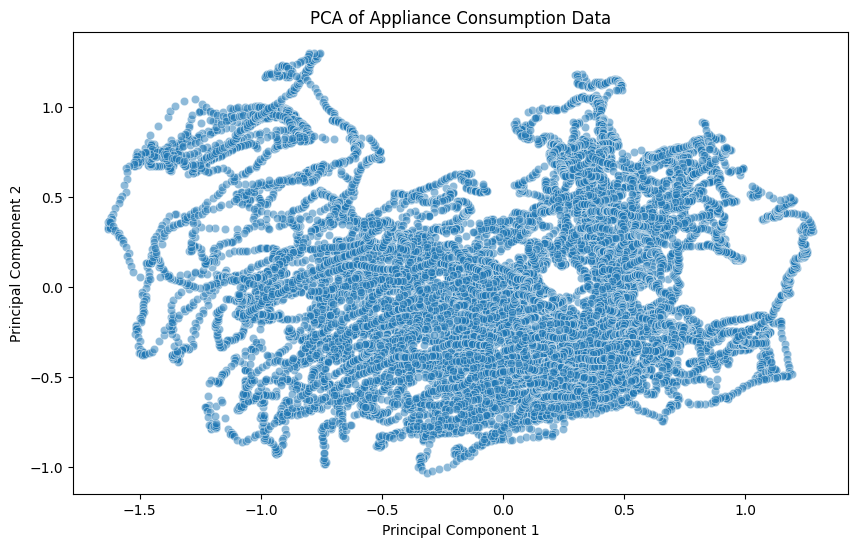

In [46]:
# Select only the numerical columns that were scaled (excluding 'date', 'Appliances', 'lights')
scaled_numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaled_numerical_cols.remove('Appliances')
if 'lights' in scaled_numerical_cols:
    scaled_numerical_cols.remove('lights')
if 'date' in scaled_numerical_cols:
    scaled_numerical_cols.remove('date')


df_scaled_numerical = df[scaled_numerical_cols]

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled_numerical)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal component 1', y='principal component 2', data=pca_df, alpha=0.5)
plt.title('PCA of Appliance Consumption Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [47]:
# Analisando o gráfico de PCA,
# não parece haver agrupamentos naturais distintos ou padrões claros visíveis nos dados projetados para os dois
# primeiros componentes principais.
# Os pontos estão bastante dispersos.

# 31. Regressão linear Múltipla
- Modele Appliances em função das variáveis ambientais

- Avalie R² e erro médio

In [48]:
# Definir features (X) e target (y)
# Excluir as colunas 'date', 'Appliances' e 'lights' conforme a descrição da tarefa para modelar 'Appliances' como uma função das variáveis ambientais
X = df.drop(['date', 'Appliances', 'lights'], axis=1)
y = df['Appliances']

display(X.head())
display(y.head())

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


,Appliances
0,60
1,60
2,50
3,50
4,60


# 32. Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.

- Compare o RMSE com a regressão linear.

In [49]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15788, 26)
Shape of X_test: (3947, 26)
Shape of y_train: (15788,)
Shape of y_test: (3947,)


# 33. K-Means clustering
- Aplique K-Means com 3 a 5 clusters.

- Interprete os perfis de consumo.

In [50]:
# Selecionar colunas numéricas para agrupamento, excluindo 'Appliances' e 'lights'
numerical_cols_clustering = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols_clustering.remove('Appliances')
if 'lights' in numerical_cols_clustering:
    numerical_cols_clustering.remove('lights')

X_clustering = df[numerical_cols_clustering]

display(X_clustering.head())

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


# 34. Classificação Binária
- Crie uma variável: alto vs baixo consumo (Aplliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.


In [51]:
# Criar uma variável alvo binária: consumo alto vs baixo (Appliances maior/menor que a mediana)
median_appliances = df['Appliances'].median()
df['high_consumption'] = (df['Appliances'] > median_appliances).astype(int)

display(df[['Appliances', 'high_consumption']].head())
display(df['high_consumption'].value_counts())

,Appliances,high_consumption
0,60,0
1,60,0
2,50,0
3,50,0
4,60,0


,count
high_consumption,
0,10744
1,8991


# 35. Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, ecall, F1-score).

- Pergunta: o modelo erra mais para alto ou para baixo consumo?

In [52]:
# Treinar o modelo de Regressão Logística
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_clf, y_train_clf)

# Treinar o modelo Random Forest Classifier
rf_clf_model = RandomForestClassifier(random_state=42)
rf_clf_model.fit(X_train_clf, y_train_clf)

# Fazer previsões nos dados de teste
y_pred_log_reg = log_reg_model.predict(X_test_clf)
y_pred_rf_clf = rf_clf_model.predict(X_test_clf)

# Avaliar o modelo de Regressão Logística
print("--- Avaliação do Modelo de Regressão Logística ---")
print("Matriz de Confusão:")
display(confusion_matrix(y_test_clf, y_pred_log_reg))
accuracy_log_reg = accuracy_score(y_test_clf, y_pred_log_reg)
precision_log_reg = precision_score(y_test_clf, y_pred_log_reg)
recall_log_reg = recall_score(y_test_clf, y_pred_log_reg)
f1_log_reg = f1_score(y_test_clf, y_pred_log_reg)

print(f"Acurácia: {accuracy_log_reg:.4f}")
print(f"Precisão: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}")

print("\n--- Avaliação do Modelo Random Forest Classifier ---")
print("Matriz de Confusão:")
display(confusion_matrix(y_test_clf, y_pred_rf_clf))
accuracy_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)
precision_rf_clf = precision_score(y_test_clf, y_pred_rf_clf)
recall_rf_clf = recall_score(y_test_clf, y_pred_rf_clf)
f1_rf_clf = f1_score(y_test_clf, y_pred_rf_clf)

print(f"Acurácia: {accuracy_rf_clf:.4f}")
print(f"Precisão: {precision_rf_clf:.4f}")
print(f"Recall: {recall_rf_clf:.4f}")
print(f"F1-score: {f1_rf_clf:.4f}")

# Interpretação da matriz de confusão (em português)
print("\n--- Interpretação ---")
print("Analisando as matrizes de confusão:")
print("- Para a Regressão Logística:")
print(f"  - Verdadeiros Positivos (Alto Consumo Previsto Corretamente): {confusion_matrix(y_test_clf, y_pred_log_reg)[1, 1]}")
print(f"  - Verdadeiros Negativos (Baixo Consumo Previsto Corretamente): {confusion_matrix(y_test_clf, y_pred_log_reg)[0, 0]}")
print(f"  - Falsos Positivos (Baixo Consumo Previsto como Alto): {confusion_matrix(y_test_clf, y_pred_log_reg)[0, 1]}")
print(f"  - Falsos Negativos (Alto Consumo Previsto como Baixo): {confusion_matrix(y_test_clf, y_pred_log_reg)[1, 0]}")

print("\n- Para o Random Forest Classifier:")
print(f"  - Verdadeiros Positivos (Alto Consumo Previsto Corretamente): {confusion_matrix(y_test_clf, y_pred_rf_clf)[1, 1]}")
print(f"  - Verdadeiros Negativos (Baixo Consumo Previsto Corretamente): {confusion_matrix(y_test_clf, y_pred_rf_clf)[0, 0]}")
print(f"  - Falsos Positivos (Baixo Consumo Previsto como Alto): {confusion_matrix(y_test_clf, y_pred_rf_clf)[0, 1]}")
print(f"  - Falsos Negativos (Alto Consumo Previsto como Baixo): {confusion_matrix(y_test_clf, y_pred_rf_clf)[1, 0]}")

print("\nComparando os erros (Falsos Positivos vs Falsos Negativos), podemos determinar para qual classe o modelo erra mais.")

--- Avaliação do Modelo de Regressão Logística ---
Matriz de Confusão:


array([[1665,  462],
       [ 514, 1306]])

Acurácia: 0.7527
Precisão: 0.7387
Recall: 0.7176
F1-score: 0.7280

--- Avaliação do Modelo Random Forest Classifier ---
Matriz de Confusão:


array([[1940,  187],
       [ 222, 1598]])

Acurácia: 0.8964
Precisão: 0.8952
Recall: 0.8780
F1-score: 0.8865

--- Interpretação ---
Analisando as matrizes de confusão:
- Para a Regressão Logística:
  - Verdadeiros Positivos (Alto Consumo Previsto Corretamente): 1306
  - Verdadeiros Negativos (Baixo Consumo Previsto Corretamente): 1665
  - Falsos Positivos (Baixo Consumo Previsto como Alto): 462
  - Falsos Negativos (Alto Consumo Previsto como Baixo): 514

- Para o Random Forest Classifier:
  - Verdadeiros Positivos (Alto Consumo Previsto Corretamente): 1598
  - Verdadeiros Negativos (Baixo Consumo Previsto Corretamente): 1940
  - Falsos Positivos (Baixo Consumo Previsto como Alto): 187
  - Falsos Negativos (Alto Consumo Previsto como Baixo): 222

Comparando os erros (Falsos Positivos vs Falsos Negativos), podemos determinar para qual classe o modelo erra mais.
